# Juntando los datasets

In [3]:
import os
import pandas as pd

# Directorio donde se encuentran los CSV
folder_path = '/Users/Daniel/Documents/ITESM/Séptimo Semestre/proyecto nlp/Predicci-n-de-Riesgos-Urbanos-con-NLP/X-NLP/DataSets'

# Lista para almacenar los DataFrames
df_list = []

# Iterar sobre los archivos en el directorio
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Cargar cada CSV en un DataFrame y añadirlo a la lista
        df = pd.read_csv(os.path.join(folder_path, filename))
        df_list.append(df)

# Concatenar todos los DataFrames de la lista en uno solo
combined_df = pd.concat(df_list, ignore_index=True)

# Guardar el DataFrame combinado en un nuevo archivo CSV
combined_df.to_csv('tweets_globales.csv', index=False)

print('CSV combinados y guardados como archivo_combinado.csv')


CSV combinados y guardados como archivo_combinado.csv


# Limpiando Dataset

In [8]:
import spacy
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

# Cargar modelo en español de spaCy
nlp = spacy.load("es_core_news_sm")

# Función para eliminar los símbolos, emoticones y links
def clean_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text)
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F700-\U0001F77F"  
        u"\U0001F780-\U0001F7FF"  
        u"\U0001F800-\U0001F8FF"  
        u"\U0001F900-\U0001F9FF"  
        u"\U0001FA00-\U0001FA6F"  
        u"\U0001FA70-\U0001FAFF"  
        u"\U00002700-\U000027BF"  
        u"\U0001F1E0-\U0001F1FF"  
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)
    text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Cargar la base de datos
tweets_file = "/Users/Daniel/Documents/ITESM/Séptimo Semestre/proyecto nlp/Predicci-n-de-Riesgos-Urbanos-con-NLP/tweets_globales.csv"
df_tweets = pd.read_csv(tweets_file)

# Eliminar tweets que no tienen texto
df_tweets_clean = df_tweets.dropna(subset=['Texto'])

# Aplicar la función de limpieza a la columna de texto 
df_tweets_clean['Texto'] = df_tweets_clean['Texto'].apply(clean_text)

# Guardar el resultado filtrado
df_tweets_clean.to_csv('/Users/Daniel/Documents/ITESM/Séptimo Semestre/proyecto nlp/Predicci-n-de-Riesgos-Urbanos-con-NLP/tweets_globales_limpios.csv', index=False)


/var/folders/8b/d34q145x44x2xf_06_gchyfw0000gq/T/ipykernel_34170/725563621.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets_clean['Texto'] = df_tweets_clean['Texto'].apply(clean_text)


# Contador de palabras

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Daniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


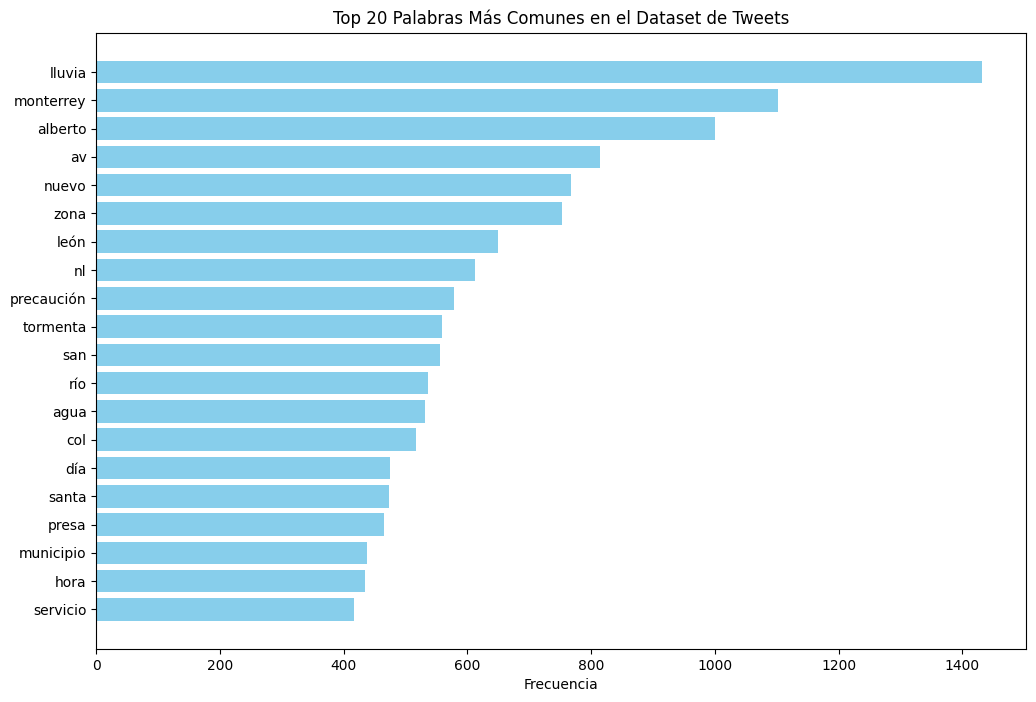

In [9]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import spacy
import matplotlib.pyplot as plt

# Descargar stopwords en español
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Cargar el modelo de spaCy para español
nlp = spacy.load('es_core_news_sm')
nlp.max_length = 1500000  # Ajusta este valor según la longitud de tu texto

# Cargar el dataset
df = pd.read_csv('tweets_globales_limpios.csv')

# Función para preprocesar el texto
def preprocess_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
    return text

# Función para lematizar y eliminar stopwords
def lemmatize_and_remove_stopwords(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]
    return lemmatized_words

# Concatenar todos los textos en una sola cadena
all_texts = ' '.join(df['Texto'].astype(str))

# Preprocesar el texto
processed_text = preprocess_text(all_texts)

# Lematizar y eliminar stopwords
lemmatized_words = lemmatize_and_remove_stopwords(processed_text)

# Contar las raíces de las palabras
word_counts = Counter(lemmatized_words)

# Mostrar las palabras más comunes
most_common_words = word_counts.most_common(20)  # Muestra las 50 palabras más comunes

# Preparar datos para la gráfica
words, counts = zip(*most_common_words)

# Crear la gráfica
plt.figure(figsize=(12, 8))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frecuencia')
plt.title('Top 20 Palabras Más Comunes en el Dataset de Tweets')
plt.gca().invert_yaxis()  # Para que la palabra más frecuente esté en la parte superior
plt.show()


In [13]:
df_tweets_clean.describe()

,Likes,Retweets,Comentarios,Citas
count,8314.000000,8314.000000,8314.000000,8314.000000
mean,340.581549,74.450565,12.966442,4.640967
std,2197.113344,614.583957,103.754157,52.739604
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,11.000000,3.000000,1.000000,0.000000
75%,55.000000,12.000000,3.000000,1.000000
max,99745.000000,20832.000000,4117.000000,3455.000000


In [14]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8314 entries, 0 to 8388
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Usuario      8314 non-null   object
 1   Nombre       8314 non-null   object
 2   Fecha        8314 non-null   object
 3   Texto        8314 non-null   object
 4   Likes        8314 non-null   int64 
 5   Retweets     8314 non-null   int64 
 6   Comentarios  8314 non-null   int64 
 7   Citas        8314 non-null   int64 
 8   Enlace       8314 non-null   object
 9   Imágenes     3593 non-null   object
 10  Videos       1656 non-null   object
 11  GIFs         41 non-null     object
dtypes: int64(4), object(8)
memory usage: 844.4+ KB


# Filrando por palabras claves

In [15]:
# Función para verificar si el tweet contiene una palabra clave o sus variantes
def contains_keyword(text, keywords, nlp):
    doc = nlp(text)
    lemmas = {token.lemma_ for token in doc}
    return any(keyword in lemmas for keyword in keywords)



#FILTRADO POR PALABRAS CLAVES
keywords = ['lluvia', 'inundación', 'accidente', 'apagón', 'deslave', 'desborde', 'incendio', 'fuga', 'colapso', 'tormenta', 'agua', 'precaución']



df_tweets_filtered = df_tweets_clean[df_tweets_clean['Texto'].apply(lambda x: contains_keyword(x, keywords, nlp))]
# Guardar el resultado filtrado
df_tweets_filtered.to_csv('/Users/Daniel/Documents/ITESM/Séptimo Semestre/proyecto nlp/Predicci-n-de-Riesgos-Urbanos-con-NLP/tweets_globales_filtrados.csv', index=False)


In [16]:
df_tweets_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2794 entries, 30 to 8386
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Usuario      2794 non-null   object
 1   Nombre       2794 non-null   object
 2   Fecha        2794 non-null   object
 3   Texto        2794 non-null   object
 4   Likes        2794 non-null   int64 
 5   Retweets     2794 non-null   int64 
 6   Comentarios  2794 non-null   int64 
 7   Citas        2794 non-null   int64 
 8   Enlace       2794 non-null   object
 9   Imágenes     1202 non-null   object
 10  Videos       760 non-null    object
 11  GIFs         16 non-null     object
dtypes: int64(4), object(8)
memory usage: 283.8+ KB
